<a href="https://colab.research.google.com/github/mdmasidulhasan27/Ai_Projects/blob/main/Masidul_FBR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic name: Food business analysis and prediction using Machine Learning.

Members info:

1. Md Sharif khan      ID: 181-15-2002
2. Md Jahid Hasan      ID: 181-15-1905
3. Md Masidul Hasan    ID: 181-15-1947



#***Importing libary and Mounting***

In [3]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**Import Data and test**

In [4]:
dataF = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML-Project/fooddata.csv")
cleanColumns = ['take_food_from_restuarent_month', 'Order_food_from_online_month', 'Cost_rest_month', 'New_recipe', 'Home_town', 'Living_Town']
dataF = dataF.drop(cleanColumns, axis=1)
dataF.head(20)

,Age,Gender,Marital_status,Division,Is_urban,Work,Income,Spicy,Sweet,Preferable_price_BDT,Street_food,Restuarent_food,Food_type
0,16-30,Male,Unmarried,Dhaka,Yes,Private Job,30000+,4,3,101-200,4,3,Traditional bengali food
1,16-30,Male,Unmarried,Rajshahi,No,Student,1-10000,4,5,101-200,5,4,Traditional bengali food
2,16-30,Male,Unmarried,Rajshahi,Yes,Student,0,5,5,1-50,5,5,Fast food
3,16-30,Male,Married,Khulna,Yes,Student,0,2,4,51-100,4,3,Traditional bengali food
4,16-30,Male,Married,Dhaka,Yes,Student,1-10000,5,2,51-100,4,2,Fast food
5,45+,Female,Married,Dhaka,Yes,Private Job,20001-30000,2,5,201-400,1,4,Traditional bengali food
6,16-30,Male,Unmarried,Dhaka,No,Student,0,4,1,51-100,3,3,Traditional bengali food
7,16-30,Male,Unmarried,Dhaka,Yes,Student,0,3,2,51-100,1,3,Others
8,16-30,Male,Unmarried,Dhaka,No,Student,1-10000,2,5,1-50,5,3,Traditional bengali food
9,16-30,Male,Unmarried,Dhaka,Yes,Student,1-10000,3,4,101-200,4,4,Traditional bengali food


#**Print columns name**

In [5]:
dataF[['Age', 'Gender']]

,Age,Gender
0,16-30,Male
1,16-30,Male
2,16-30,Male
3,16-30,Male
4,16-30,Male
...,...,...
417,16-30,Male
418,16-30,Male
419,16-30,Male
420,45+,Female


In [6]:
dataF.columns

Index(['Age', 'Gender', 'Marital_status', 'Division', 'Is_urban', 'Work',
       'Income', 'Spicy', 'Sweet', 'Preferable_price_BDT', 'Street_food',
       'Restuarent_food', 'Food_type'],
      dtype='object')

In [7]:
dataF.shape

(422, 13)

In [8]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   422 non-null    object
 1   Gender                422 non-null    object
 2   Marital_status        422 non-null    object
 3   Division              422 non-null    object
 4   Is_urban              422 non-null    object
 5   Work                  422 non-null    object
 6   Income                422 non-null    object
 7   Spicy                 422 non-null    int64 
 8   Sweet                 422 non-null    int64 
 9   Preferable_price_BDT  422 non-null    object
 10  Street_food           422 non-null    int64 
 11  Restuarent_food       422 non-null    int64 
 12  Food_type             422 non-null    object
dtypes: int64(4), object(9)
memory usage: 43.0+ KB


In [9]:
dataF.isnull().sum()

Age                     0
Gender                  0
Marital_status          0
Division                0
Is_urban                0
Work                    0
Income                  0
Spicy                   0
Sweet                   0
Preferable_price_BDT    0
Street_food             0
Restuarent_food         0
Food_type               0
dtype: int64

## **Data Cleaning**

In [10]:
for data in [dataF]:
  data["Age"] = data["Age"].replace("0-15",0)
  data["Age"] = data["Age"].replace("16-30",1)
  data["Age"] = data["Age"].replace("31-45",2)
  data["Age"] = data["Age"].replace("45+",3)

In [11]:
gender_map = {"Male":0,
              "Female":1,
              "Other":2}
for data in [dataF]:
  data['Gender'] = data['Gender'].map(gender_map)

In [12]:
marrital_status_map = {"Married":0,
                       "Unmarried":1}
for data in [dataF]:
  data['Marital_status'] = data['Marital_status'].map(marrital_status_map)

In [13]:
division_map = {"Barisal":0,
                "Chittagong":1,
                "Dhaka":2,
                "Khulna":3,
                "Mymensingh":4,
                "Rajshahi":5,
                "Sylhet":6,
                "Rangpur":7}
for data in [dataF]:
  data['Division'] = data['Division'].map(division_map)

In [14]:
urban_map = {"Yes":1
             ,"No":0}
for data in [dataF]:
  data['Is_urban'] = data['Is_urban'].map(urban_map)

In [15]:
work_map = {"Private Job":0,
            "Govt. Job":1,
            "Business":2,
            "Student":3,
            "None":4}
for data in [dataF]:
  data['Work'] = data['Work'].map(work_map)

In [16]:
for dataset in [dataF]:
  dataset["Income"] = dataset["Income"].replace("0",0)
  dataset["Income"] = dataset["Income"].replace("1-10000",1)
  dataset["Income"] = dataset["Income"].replace("10001-20000",2)
  dataset["Income"] = dataset["Income"].replace("20001-30000",3)
  dataset["Income"] = dataset["Income"].replace("30000+",4)

In [17]:
for dataset in [dataF]:
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("1-50",0)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("51-100",1)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("101-200",2)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("201-400",3)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("401-500",4)
  dataset["Preferable_price_BDT"] = dataset["Preferable_price_BDT"].replace("501+",5)

In [18]:
food_map = {"Fast food":0,
            "Traditional bengali food":1,
            "Others":2}
for data in [dataF]:
  data['Food_type'] = data['Food_type'].map(food_map)

In [19]:
# dataFrame = dataF.copy()
# rows = dataframe.shape[0]
dataF['Street_restaurant_both'] = 0
# for i in range(rows):
#   if(dataframe['Street_food'][i] > dataframe['Restuarent_food'][i]):
#     dataframe['Street_restaurant_both'][i] = 0
#   elif(dataframe['Street_food'][i] < dataframe['Restuarent_food'][i]):
#     dataframe['Street_restaurant_both'][i] = 1
#   else:
#     dataframe['Street_restaurant_both'][i] = 2

for dataset in [dataF]:
    dataset.loc[ dataset['Street_food'] > dataset['Restuarent_food'], 'Street_restaurant_both'] = 0
    dataset.loc[ dataset['Street_food'] < dataset['Restuarent_food'], 'Street_restaurant_both'] = 1
    dataset.loc[ dataset['Street_food'] == dataset['Restuarent_food'], 'Street_restaurant_both'] = 2
    
deleteRows = ['Street_food', 'Restuarent_food']
dataF = dataF.drop(deleteRows, axis = 1)

In [20]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     422 non-null    int64
 1   Gender                  422 non-null    int64
 2   Marital_status          422 non-null    int64
 3   Division                422 non-null    int64
 4   Is_urban                422 non-null    int64
 5   Work                    422 non-null    int64
 6   Income                  422 non-null    int64
 7   Spicy                   422 non-null    int64
 8   Sweet                   422 non-null    int64
 9   Preferable_price_BDT    422 non-null    int64
 10  Food_type               422 non-null    int64
 11  Street_restaurant_both  422 non-null    int64
dtypes: int64(12)
memory usage: 39.7 KB


In [21]:
dataF.head(6)

,Age,Gender,Marital_status,Division,Is_urban,Work,Income,Spicy,Sweet,Preferable_price_BDT,Food_type,Street_restaurant_both
0,1,0,1,2,1,0,4,4,3,2,1,0
1,1,0,1,5,0,3,1,4,5,2,1,0
2,1,0,1,5,1,3,0,5,5,0,0,2
3,1,0,0,3,1,3,0,2,4,1,1,0
4,1,0,0,2,1,3,1,5,2,1,0,0
5,3,1,0,2,1,0,3,2,5,3,1,1


#**Visualization**

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
def bar_chart(feature):
    Fast_food = dataF[dataF['Food_type']==0][feature].value_counts()
    TBF = dataF[dataF['Food_type']==1][feature].value_counts()
    others = dataF[dataF['Food_type']==2][feature].value_counts()
    dff = pd.DataFrame([Fast_food,TBF,others])
    dff.index = ['Fast food','TBF','Others']
    dff.plot(kind='bar',stacked=True, figsize=(10,5))

In [24]:
dataF.columns

Index(['Age', 'Gender', 'Marital_status', 'Division', 'Is_urban', 'Work',
       'Income', 'Spicy', 'Sweet', 'Preferable_price_BDT', 'Food_type',
       'Street_restaurant_both'],
      dtype='object')

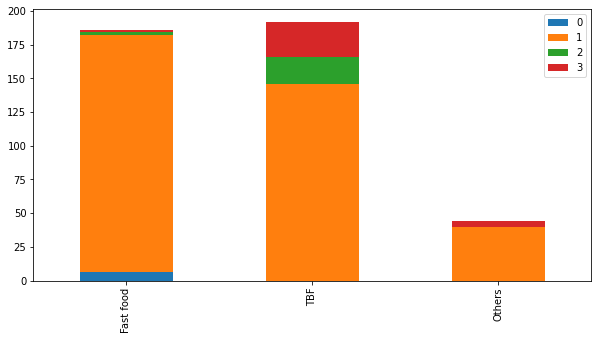

In [25]:
bar_chart('Age')

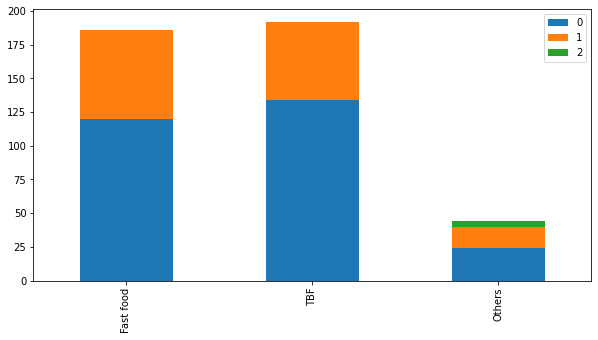

In [26]:
bar_chart('Gender')

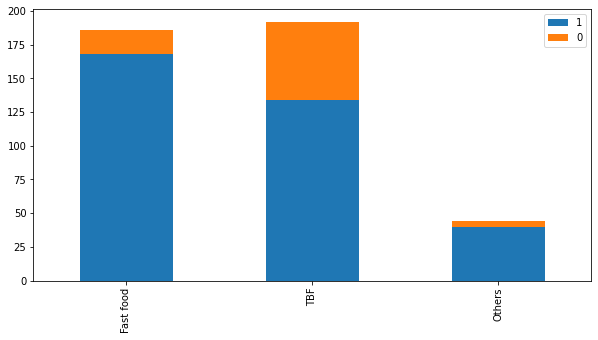

In [27]:
bar_chart('Marital_status')

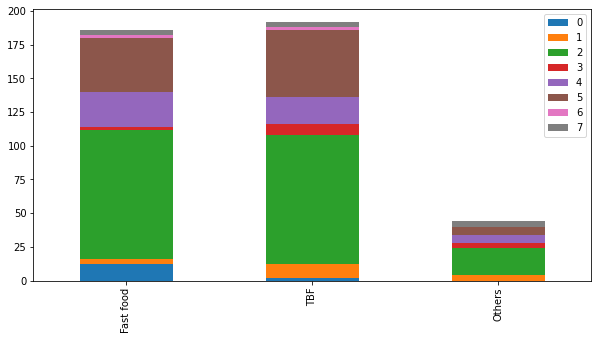

In [28]:
bar_chart('Division')

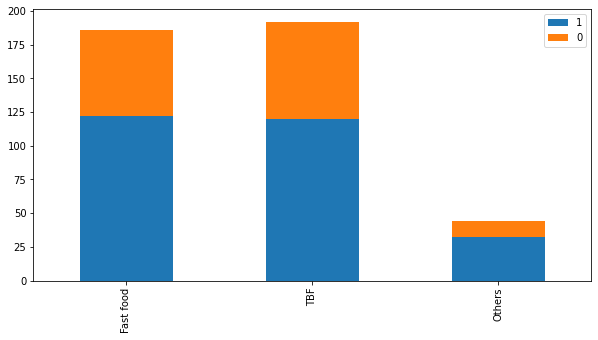

In [29]:
bar_chart('Is_urban')

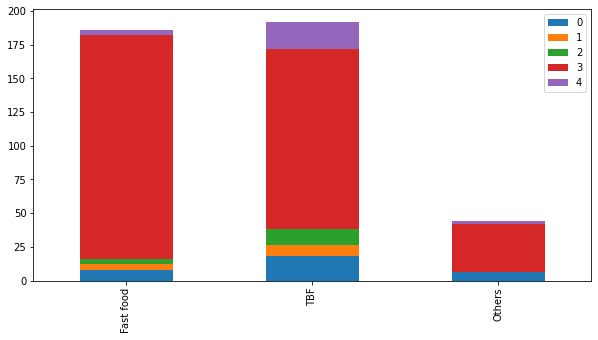

In [30]:
bar_chart('Work')

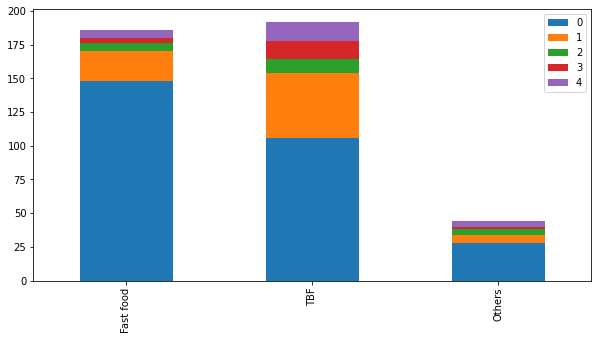

In [31]:
bar_chart('Income')

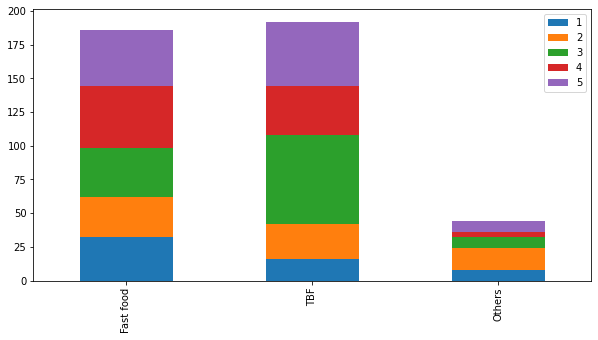

In [32]:
bar_chart('Sweet')

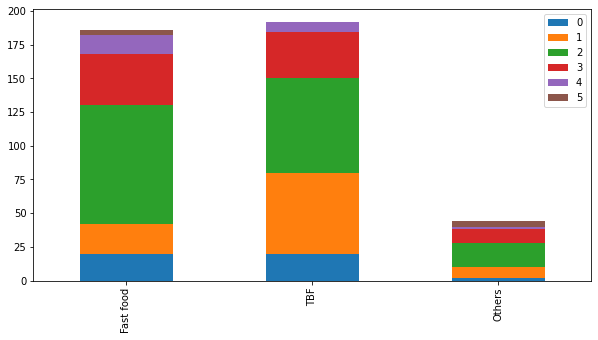

In [33]:
bar_chart('Preferable_price_BDT')

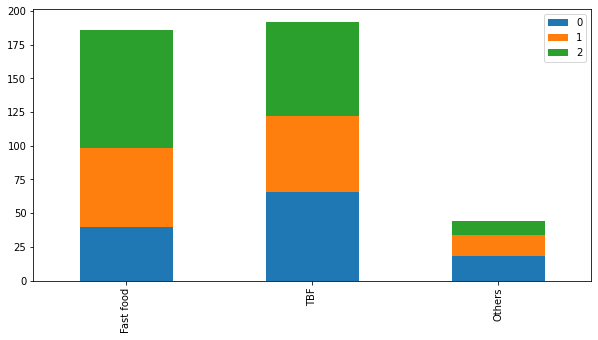

In [34]:
bar_chart('Street_restaurant_both')

In [35]:
def scatter_diagram(feature):
  plt.scatter(dataF[feature],dataF['Food_type'])
  plt.xlabel(feature)
  plt.ylabel("Food type")
  plt.show()

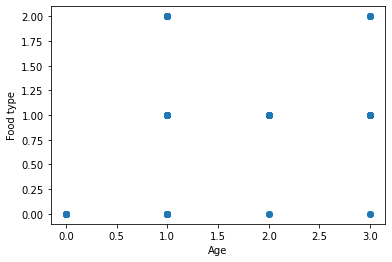

In [36]:
scatter_diagram('Age')

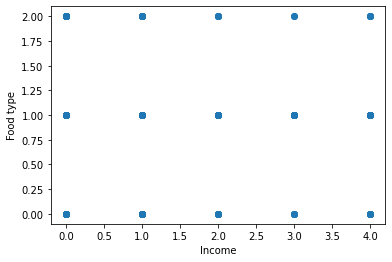

In [37]:
scatter_diagram('Income')

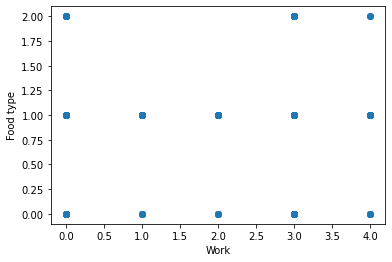

In [38]:
scatter_diagram('Work')

#**Preparing data for model**

In [39]:
Train = dataF.drop(['Food_type'],axis=1)
Test = dataF["Food_type"]

In [40]:
Train.shape, Test.shape

((422, 11), (422,))

#**Spliting data**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [42]:
x_train, x_test, y_train, y_test = train_test_split(Train, Test,test_size=.20)
x_train.shape,y_train.shape

((337, 11), (337,))

#**Desicion Tree**

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [44]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring,error_score='raise')
print(score)

[0.91176471 0.82352941 0.85294118 0.70588235 0.97058824 0.91176471
 0.94117647 0.90909091 0.84848485 0.87878788]


In [45]:
round(np.mean(score)*100, 2)

87.54

In [46]:
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_test, prediction)*100

85.88235294117646

In [47]:
print("Confusion Matrix -->")
cm = confusion_matrix(y_test, prediction)
print(cm)
print("Classification Report -->")
print(classification_report(y_test, prediction))

Confusion Matrix -->
[[29  6  0]
 [ 2 35  2]
 [ 2  0  9]]
Classification Report -->
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.85      0.90      0.88        39
           2       0.82      0.82      0.82        11

    accuracy                           0.86        85
   macro avg       0.85      0.85      0.85        85
weighted avg       0.86      0.86      0.86        85



Text(66.5, 0.5, 'Truth')

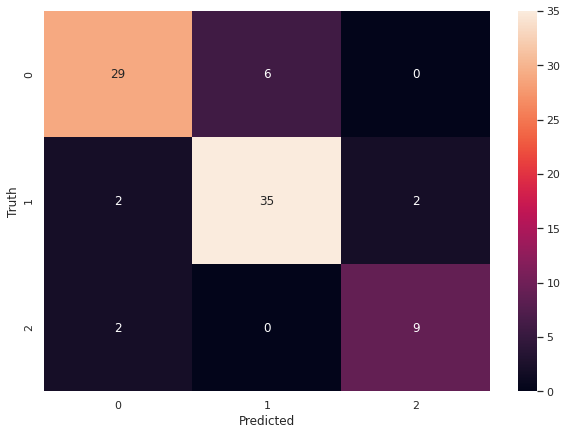

In [48]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Random forest**

In [49]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, Train, Test, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95348837 0.93023256 0.92857143 0.92857143 0.9047619  0.9047619
 0.97619048 0.9047619  1.         0.88095238]


In [50]:
round(np.mean(score)*100, 2)

93.12

In [51]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
accuracy_score(y_test, prediction)*100

81.17647058823529

In [53]:
print("Confusion Matrix -->")
cmr = confusion_matrix(y_test, prediction)
print(cmr)

print("Classification Report -->")
print(classification_report(y_test, prediction))

Confusion Matrix -->
[[29  4  2]
 [ 7 32  0]
 [ 2  1  8]]
Classification Report -->
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.86      0.82      0.84        39
           2       0.80      0.73      0.76        11

    accuracy                           0.81        85
   macro avg       0.81      0.79      0.80        85
weighted avg       0.81      0.81      0.81        85



Text(66.5, 0.5, 'Truth')

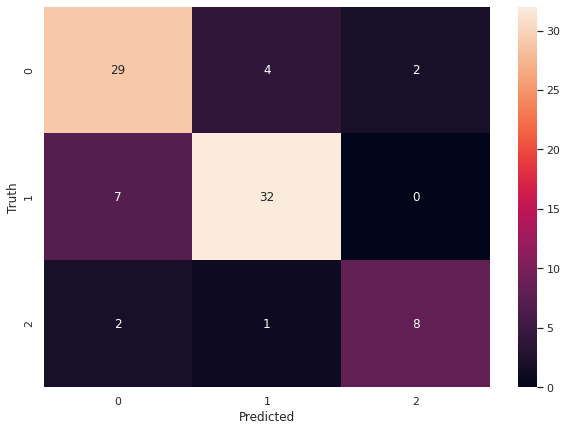

In [54]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**K Neighber Classifier**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
f1_score, jaccard_similarity_score

# for k in range(1,11):
#   knn_model = KNeighborsClassifier(n_neighbors=k)
#   knn_model.fit(x_train, y_train)

#   knn_result = knn_model.predict(x_test)

#   print("Confusion Matrix -->")
#   print(confusion_matrix(y_test, knn_result))

#   print("Classification Report -->")
#   print(classification_report(y_test, knn_result))
#   print("Accuricy : ",jaccard_similarity_score(y_test, knn_result))
#   print("Train set Accuricy", jaccard_similarity_score(y_train, knn_model.predict(x_train)))
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
knn_result = knn_model.predict(x_test)
print("Confusion Matrix -->")
print(confusion_matrix(y_test, knn_result))

print("Classification Report -->")
print(classification_report(y_test, knn_result))
print("Accuricy : ",jaccard_similarity_score(y_test, knn_result)*100)
print("Train set Accuricy", jaccard_similarity_score(y_train, knn_model.predict(x_train))*100)

Confusion Matrix -->
[[29  2  4]
 [ 2 37  0]
 [ 0  2  9]]
Classification Report -->
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.90      0.95      0.92        39
           2       0.69      0.82      0.75        11

    accuracy                           0.88        85
   macro avg       0.84      0.87      0.85        85
weighted avg       0.89      0.88      0.88        85

Accuricy :  88.23529411764706
Train set Accuricy 99.40652818991099


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [56]:
knn_result = knn_model.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix, \
f1_score, jaccard_similarity_score
print("Confusion Matrix -->")
print(confusion_matrix(y_test, knn_result))

print("Classification Report -->")
print(classification_report(y_test, knn_result))

Confusion Matrix -->
[[29  2  4]
 [ 2 37  0]
 [ 0  2  9]]
Classification Report -->
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        35
           1       0.90      0.95      0.92        39
           2       0.69      0.82      0.75        11

    accuracy                           0.88        85
   macro avg       0.84      0.87      0.85        85
weighted avg       0.89      0.88      0.88        85



In [58]:
print("Accuricy : ",jaccard_similarity_score(y_test, knn_result)*100)


Accuricy :  88.23529411764706


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#**Support Vector Machine**

In [59]:
from sklearn import svm
svm_model = svm.SVC(C= 20, gamma= 'auto', kernel='rbf')
svm_model.fit(x_train, y_train)

SVC(C=20, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
svm_result = svm_model.predict(x_test)
print("Confusion Matrix : ", confusion_matrix(y_test, svm_result))
print(classification_report(y_test, svm_result))
print("Jaccard index : ", jaccard_similarity_score(y_test, svm_result))

Confusion Matrix :  [[25  8  2]
 [ 5 34  0]
 [ 4  0  7]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        35
           1       0.81      0.87      0.84        39
           2       0.78      0.64      0.70        11

    accuracy                           0.78        85
   macro avg       0.77      0.74      0.75        85
weighted avg       0.77      0.78      0.77        85

Jaccard index :  0.7764705882352941


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


#**Logistic Regression**

In [61]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression()

In [62]:
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
log_predict = log_reg.predict(x_test)

In [64]:
accuracy_score(y_test, log_predict)

0.5647058823529412

In [65]:
cmlr = confusion_matrix(y_test,log_predict)
cmlr

array([[23, 12,  0],
       [15, 24,  0],
       [ 4,  6,  1]])

Text(66.5, 0.5, 'Truth')

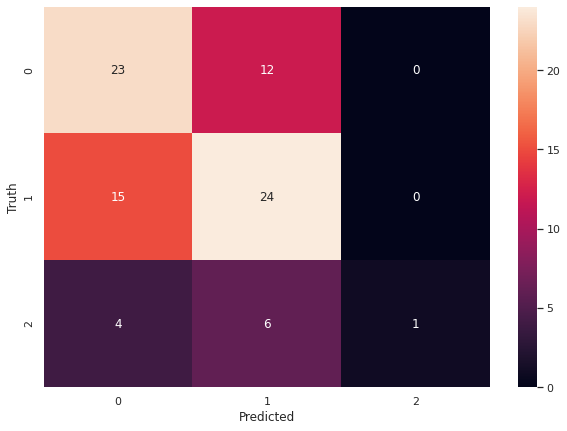

In [66]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmlr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Naive Bayes**

In [67]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [68]:
accuracy_score(y_test, y_pred)*100

48.23529411764706

In [69]:
cmgnb = confusion_matrix(y_test,y_pred)
cmgnb

array([[30,  5,  0],
       [28, 11,  0],
       [ 8,  3,  0]])

Text(66.5, 0.5, 'Truth')

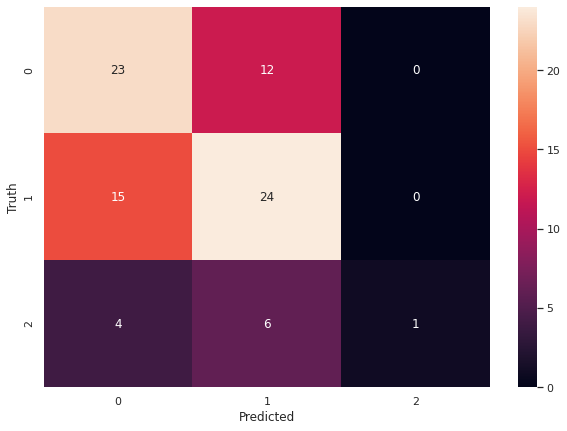

In [70]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmlr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)

In [72]:
accuracy_score(y_test, y_pred)*100

55.294117647058826

In [73]:
cmbnb = confusion_matrix(y_test,y_pred)
cmbnb

array([[22, 13,  0],
       [14, 25,  0],
       [ 5,  6,  0]])

Text(66.5, 0.5, 'Truth')

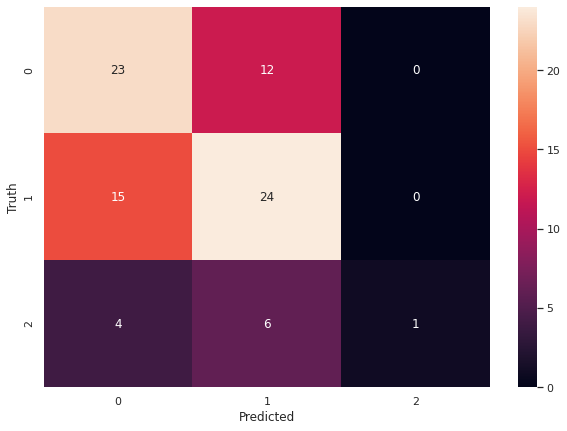

In [74]:
import seaborn as sn
sn.set()
plt.figure(figsize=(10,7))
sn.heatmap(cmlr,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')